# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
def weather_plot(plot_name, axis_x, axis_y, title, labelx, labely):
    fig, plot_name = plt.subplots(figsize=(8,5))
    fig.suptitle(title, fontsize='14')
    
    axis_xs = axis_x
    axis_xs_mean = axis_xs.mean()
    axis_ys = axis_y

    plot_name.scatter(axis_xs, axis_ys, color='steelblue', marker='o', edgecolors='black')
    plot_name.grid()
    plot_name.set_xlabel(labelx)
    plot_name.set_ylabel(labely)
    #plot_name.set_xlim([60,105])
    plot_name.legend(loc='best')
    return plt.show()

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
_api_city = []
_api_cloudiness = []
_api_country = []
_api_date = []
_api_humidity = []
_api_lat = []
_api_lng = []
_api_max_temp = []
_api_wind_speed = []
_api_cities_dict = {}

_open_weather_url = 'https://api.openweathermap.org/data/2.5/weather?'
print('Beginning Data Retrieval\n-----------------------------')
for i in cities:
    _query_url = _open_weather_url + 'q='+i+'&appid='+api_key
    _api_data = requests.get(_query_url).json()
    if(_api_data['cod'] == 200):
        print("Retrieving data from " + str(i))
        _api_city.append(i)
        _api_cloudiness.append(_api_data['clouds']['all'])
        _api_country.append(_api_data['sys']['country'])
        _api_date.append(_api_data['dt'])
        _api_humidity.append(_api_data['main']['humidity'])
        _api_lat.append(_api_data['coord']['lat'])
        _api_lng.append(_api_data['coord']['lon'])
        _api_max_temp.append(_api_data['main']['temp_max'])
        _api_wind_speed.append(_api_data['wind']['speed'])
    else:
        print(str(i) + ' not found. Skipping...' )


Beginning Data Retrieval
-----------------------------
Retrieving data from najran
Retrieving data from bredasdorp
Retrieving data from norman wells
Retrieving data from tiksi
Retrieving data from rikitea
Retrieving data from hobart
Retrieving data from carnarvon
tenosique not found. Skipping...
Retrieving data from provideniya
utiroa not found. Skipping...
taolanaro not found. Skipping...
Retrieving data from mataura
Retrieving data from cape town
Retrieving data from jamestown
Retrieving data from pochutla
lolua not found. Skipping...
Retrieving data from zhigansk
Retrieving data from taft
Retrieving data from naze
Retrieving data from yulara
Retrieving data from butaritari
Retrieving data from berezovka
Retrieving data from bluff
olafsvik not found. Skipping...
Retrieving data from gopalur
Retrieving data from nelspruit
sentyabrskiy not found. Skipping...
Retrieving data from college
Retrieving data from severo-kurilsk
Retrieving data from chokurdakh
Retrieving data from albany
Retr

la uribe not found. Skipping...
Retrieving data from cidreira
Retrieving data from vila velha
Retrieving data from fortuna
Retrieving data from bathsheba
Retrieving data from katsuura
Retrieving data from raudeberg
Retrieving data from roma
Retrieving data from kuytun
Retrieving data from znamenskoye
Retrieving data from havoysund
Retrieving data from arraial do cabo
asau not found. Skipping...
Retrieving data from abu samrah
Retrieving data from ostersund
Retrieving data from sisimiut
Retrieving data from lagoa
Retrieving data from skjervoy
Retrieving data from cockburn town
Retrieving data from myslenice
Retrieving data from vila
Retrieving data from romans-sur-isere
Retrieving data from okhotsk
Retrieving data from ilinskiy
Retrieving data from novikovo
Retrieving data from seminole
Retrieving data from paita
Retrieving data from kavaratti
Retrieving data from ballina
Retrieving data from auki
waw not found. Skipping...
Retrieving data from sao joao da barra
Retrieving data from sap

Retrieving data from amahai
Retrieving data from matagami
Retrieving data from varhaug
Retrieving data from shingu
Retrieving data from bemidji
Retrieving data from kitgum
Retrieving data from willowmore
Retrieving data from kibala
Retrieving data from ekibastuz
Retrieving data from ambilobe
Retrieving data from haimen
Retrieving data from sao felix do xingu
bur gabo not found. Skipping...
Retrieving data from carutapera
Retrieving data from margate
Retrieving data from le port
Retrieving data from keokuk
Retrieving data from kinshasa
Retrieving data from liuzhou
Retrieving data from edeia
Retrieving data from aparan
Retrieving data from fort smith
Retrieving data from westport
mirina not found. Skipping...
Retrieving data from brigantine
Retrieving data from beidao
Retrieving data from maniitsoq
Retrieving data from lhokseumawe
bolungarvik not found. Skipping...
Retrieving data from porosozero
Retrieving data from moyale
Retrieving data from ostrovnoy
Retrieving data from dawei
Retrie

In [5]:
_api_cities_dict = list(zip(_api_city, _api_cloudiness, _api_country, _api_date, _api_humidity, _api_lat, _api_lng, _api_max_temp,_api_wind_speed))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
_openweather_info_df = pd.DataFrame(_api_cities_dict,
                                   columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])

In [7]:
_openweather_info_df.to_csv(output_data_file)
_openweather_info_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,najran,40,SA,1562951568,12,17.54,44.22,309.150,5.1
1,bredasdorp,87,ZA,1562951569,67,-34.53,20.04,288.150,4.1
2,norman wells,20,CA,1562951569,66,65.28,-126.83,285.150,4.6
3,tiksi,16,RU,1562951570,67,71.64,128.87,281.202,2.2
4,rikitea,49,PF,1562951570,79,-23.12,-134.97,296.802,7.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

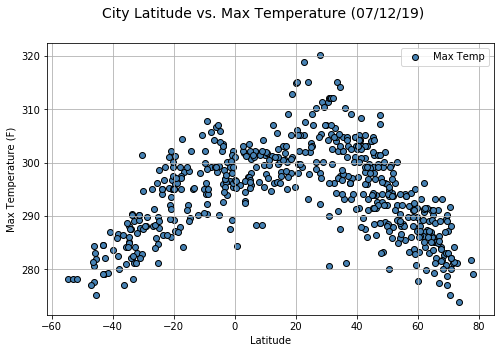

In [8]:
weather_plot('lat_vs_temperature', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Max Temp'], 
             'City Latitude vs. Max Temperature (07/12/19)', 
             'Latitude', 
             'Max Temperature (F)')

#### Latitude vs. Humidity Plot

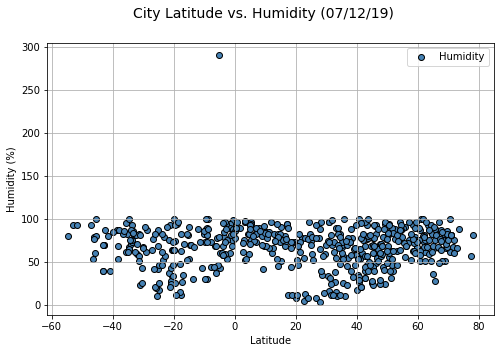

In [9]:
weather_plot('lat_vs_humidity', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Humidity'], 
             'City Latitude vs. Humidity (07/12/19)', 
             'Latitude', 
             'Humidity (%)')

#### Latitude vs. Cloudiness Plot

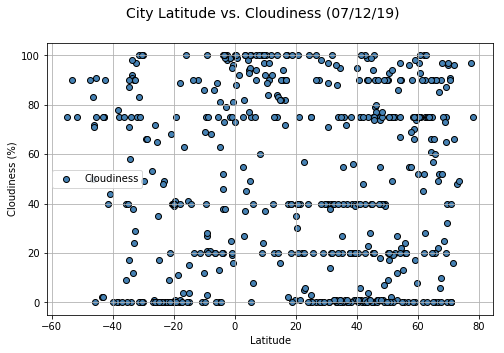

In [12]:
weather_plot('lat_vs_cloudiness', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Cloudiness'], 
             'City Latitude vs. Cloudiness (07/12/19)', 
             'Latitude', 
             'Cloudiness (%)')

#### Latitude vs. Wind Speed Plot

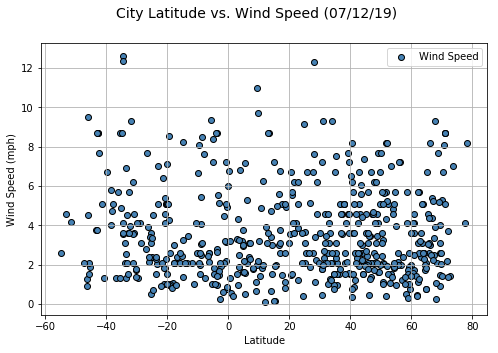

In [13]:
weather_plot('lat_vs_wind_speed', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Wind Speed'], 
             'City Latitude vs. Wind Speed (07/12/19)', 
             'Latitude', 
             'Wind Speed (mph)')